In [1]:
import pandas as pd
import numpy as np

In [2]:
columns = ['tide_00','tide_01','tide_02','tide_03','tide_04','tide_05','tide_06','tide_07','tide_08','tide_09','tide_10','tide_11',
           'tide_12','tide_13','tide_14','tide_15','tide_16','tide_17','tide_18','tide_19','tide_20','tide_21','tide_22','tide_23',
           'year','month','day',
           'point_mark',
           'max_time_1','max_level_1','max_time_2','max_level_2','max_time_3','max_level_3','max_time_4','max_level_4',
           'min_time_1','min_level_1','min_time_2','min_level_2','min_time_3','min_level_3','min_time_4','min_level_4',
        ]
oneday_size = len(columns)
oneday_size

44

In [3]:
import pandas as pd
import numpy as np

class TideGruff():
    
    def __init__(self):
        self.one_year = []
    
    def read_tide(self, file_name):
        try:
            tide_df = pd.read_table(file_name, header=None)

            # データのひと区切りの位置
            TIDE = 72
            YMD  = 78
            MARK = 80
            HIGH = 108
            LOW  = 136
            for key, column in tide_df.iterrows():
                one_record = []

                one_day = column[0]  # 文字列として操作
                #print(one_day[:TIDE])
                #print(one_day[TIDE:YMD])
                #print(one_day[YMD:MARK])
                #print(one_day[MARK:HIGH])
                #print(one_day[HIGH:LOW])

                ## 毎時潮位データ
                pockets = []
                s = 0
                e = 3  # 3桁
                level = one_day[:TIDE]
                divi = len(level) // e
                for _ in range(divi):
                    pockets = pockets + [level[s:s+e]] # リスト同士はくっつけることが出来る
                    s += e
                one_record = one_record + pockets
                #print(pockets)

                ## 年月日
                pockets = []
                s = 0
                e = 2  # 2桁
                ymd = one_day[TIDE:YMD]
                divi = len(ymd) // e
                for _ in range(divi):
                    pockets = pockets + [ymd[s:s+e]]
                    s += e
                one_record = one_record + pockets
                #print(pockets)

                ## 地点記号
                point_mark = one_day[YMD:MARK]
                pockets = [point_mark] 
                one_record = one_record + pockets
                #print(point_mark)

                ## 満潮時刻・潮位
                pockets = []
                s = 0
                e = 4 + 3  # 7桁
                max_tide = one_day[MARK:HIGH]
                divi = len(max_tide) // e
                for _ in range(divi):
                    pockets = pockets + [max_tide[s:s+4], max_tide[s+4:s+e]]
                    s += e
                one_record = one_record + pockets
                #print(pockets)

                ## 干潮時刻・潮位
                pockets = []
                s = 0
                e = 4 + 3  # 7桁
                min_tide = one_day[HIGH:LOW]
                divi = len(min_tide) // e
                for _ in range(divi):
                    pockets = pockets + [min_tide[s:s+4], min_tide[s+4:s+e]]
                    s += e
                one_record = one_record + pockets
                #print(pockets)

                self.one_year = self.one_year + one_record
                
        except Exception as e:
            print(e)
    
    # 次元の変更
    def reshape(self, h, v=-1):
        self.one_year = np.array(self.one_year).reshape(v, h)

        

In [4]:
file_name ='tide_data/ZJ.txt'
tidegruff = TideGruff()
tidegruff.read_tide(file_name)
tidegruff.reshape(oneday_size)

one_point = pd.DataFrame(tidegruff.one_year)
one_point.columns = columns
one_point

def make_ymd_format():
    df = one_point[['point_mark', 'year', 'month', 'day']]
    for i, data in df.iterrows():
        index_format = '%s20%02d%02d%02d' % (data[0], int(data[1]), int(data[2]), int(data[3]))
        one_point.loc[i, 'index'] = index_format

make_ymd_format()

one_point.set_index('index', drop=True, inplace=True)
one_point

,tide_00,tide_01,tide_02,tide_03,tide_04,tide_05,tide_06,tide_07,tide_08,tide_09,...,max_time_4,max_level_4,min_time_1,min_level_1,min_time_2,min_level_2,min_time_3,min_level_3,min_time_4,min_level_4
index,,,,,,,,,,,,,,,,,,,,,
ZJ20220101,0,8,42,96,157,209,244,255,242,211,...,9999,999,012,-1,1247,100,9999,999,9999,999
ZJ20220102,-6,-22,-8,35,98,166,224,259,268,252,...,9999,999,1 3,-22,1342,98,9999,999,9999,999
ZJ20220103,18,-23,-35,-15,36,107,179,237,270,274,...,9999,999,153,-36,1432,94,9999,999,9999,999
ZJ20220104,65,5,-32,-38,-10,47,121,193,246,273,...,9999,999,241,-40,1518,91,9999,999,9999,999
ZJ20220105,121,54,0,-30,-28,6,68,140,206,251,...,9999,999,328,-33,16 3,89,9999,999,9999,999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZJ20221227,184,125,64,15,-12,-10,21,77,142,200,...,9999,999,427,-15,17 5,99,9999,999,9999,999
ZJ20221228,214,172,119,68,28,10,16,49,100,156,...,9999,999,515,9,1758,99,9999,999,9999,999
ZJ20221229,219,198,163,120,79,49,37,47,77,121,...,9999,999,6 5,37,1856,97,9999,999,9999,999


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import seaborn as sns; sns.set() # sns.set() ==> グラフの見た目をseabornに合わせる
sns.set(style="darkgrid", font="IPAexGothic")
%matplotlib inline

japanize_matplotlib.japanize()
#one_point.loc['ZJ20220716']

In [13]:
import datetime

def target_days(myday):
    # 今日を求める
    ymd = myday.strftime('%Y%m%d')
    # 明日を求める
    _tommorow = myday + datetime.timedelta(days=1)
    tommorow = _tommorow.strftime('%Y%m%d')

    target_day = 'ZJ' + ymd
    next_target_day = 'ZJ' + tommorow

    return target_day, next_target_day

#myday = datetime.date.today()
myday = datetime.datetime(2022, 6, 19) # mydayはグラフ表示に使っている
target_day, next_target_day = target_days(myday)
print(target_day, next_target_day)

ZJ20220619 ZJ20220620


In [14]:
# 潮位の最大と最小を取得する
def max_min_tide(target_day, next_target_day):
    
    yama= one_point.loc[target_day, ['max_time_1','max_level_1','max_time_2','max_level_2','max_time_3','max_level_3','max_time_4','max_level_4']]
    max_tide = []
    for i in range(0, 4):
        col_t = f'max_time_{i+1}'
        col_l = f'max_level_{i+1}'
        if yama[col_t] != '9999':
            h = int(yama[col_t][:2])
            m = int(yama[col_t][2:]) # 0埋め出来るように数値を作り直す
            #print(f'{h:02d}{m:02d}', yama[col_l])
            max_tide = max_tide + [f'{h:02d}{m:02d}', yama[col_l]]

    tani= one_point.loc[target_day, ['min_time_1','min_level_1','min_time_2','min_level_2','min_time_3','min_level_3','min_time_4','min_level_4']]
    min_tide = []
    for i in range(0, 4):
        col_t = f'min_time_{i+1}'
        col_l = f'min_level_{i+1}'
        if tani[col_t] != '9999':
            h = int(tani[col_t][:2])
            m = int(tani[col_t][2:]) # 0埋め出来るように数値を作り直す
            #print(f'{h:02d}{m:02d}', tani[col_l])
            min_tide = min_tide + [f'{h:02d}{m:02d}', tani[col_l]]

    return max_tide, min_tide

max_tide, min_tide = max_min_tide(target_day, next_target_day)

max_tide, min_tide

(['1055', '246'], ['0536', '125', '1745', ' 41'])

In [15]:
# 次の日の0:00の潮位を取得する
tommorow_00 = ['2400', one_point.loc[next_target_day, 'tide_00']]
tommorow_00

['2400', '248']

In [16]:
# 最大の潮位を求めてみる
another = one_point[['max_level_1','max_level_2','max_level_3','max_level_4']]
another = another.astype(int)
another = another.replace(999, -999)
another.query('max_level_2 > 300')

# 2022年9月11日辺りが最大っぽい
# ZJ20220911
MAX_TIDE_DAY = 'ZJ20220911'
MAX_TIDE_NEXT = 'ZJ20220912'

In [17]:
# 1年で最大の潮位の日の処理
around_max_tide, around_min_tide = max_min_tide(MAX_TIDE_DAY, MAX_TIDE_NEXT)
around_tommorow_00 = ['2400', one_point.loc[MAX_TIDE_NEXT, 'tide_00']]

around_tide_cols = []
for i in range(0, 24):
    col_name = f'tide_{i:02d}'
    around_tide_cols = np.append(around_tide_cols, [i*100, one_point.loc[MAX_TIDE_DAY, col_name]])

around_tide_cols = np.append(around_tide_cols, around_max_tide)
around_tide_cols = np.append(around_tide_cols, around_min_tide)
around_tide_cols = np.append(around_tide_cols, around_tommorow_00) # 次の日の0:00を24:00として追加

around_tide_data = pd.DataFrame(np.array(around_tide_cols).reshape(-1, 2), columns=['時', '潮位'])
around_tide_data = around_tide_data.astype(int).sort_values('時') # ついでに時間でソートしておく
around_tide_data.head()

,時,潮位
0,0,146
1,100,100
2,200,78
26,215,77
3,300,86


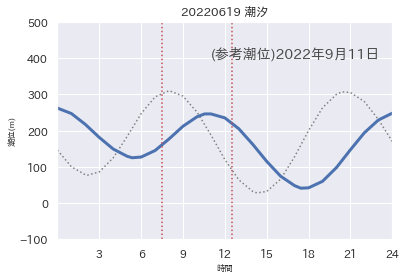

In [18]:
tide_cols = []
for i in range(0, 24):
    col_name = f'tide_{i:02d}'
    tide_cols = np.append(tide_cols, [i*100, one_point.loc[target_day, col_name]])
    #print([i, one_point.loc['ZJ20220716', col_name]])
    #print(one_point.loc['ZJ20220716', col_name])
#tide_data = np.array(tide_cols).reshape(-1, 2)

tide_cols = np.append(tide_cols, max_tide)
tide_cols = np.append(tide_cols, min_tide)
tide_cols = np.append(tide_cols, tommorow_00) # 次の日の0:00を24:00として追加

tide_data = pd.DataFrame(np.array(tide_cols).reshape(-1, 2), columns=['時', '潮位'])
tide_data = tide_data.astype(int).sort_values('時')

fig, ax = plt.subplots()
#sns.set_context('talk')
ax.plot(around_tide_data['時'].values, around_tide_data['潮位'].values, color='gray', marker='', linestyle='dotted', antialiased=True)
ax.plot(tide_data['時'].values, tide_data['潮位'].values, color='b', marker='', linestyle='solid', linewidth=3, antialiased=True)
#sns.relplot(x='時', y='潮位', data=tide_data, kind='line', height=6, aspect=1.35, color='b')
#sns.relplot(x='時', y='潮位', data=around_tide_data, kind='line', height=6, aspect=1.35, color='y')
my_day = myday.strftime('%Y%m%d')
plt.title(f'{my_day} 潮汐')
plt.xlim(0, 2400)
plt.ylim(-100, 500)
plt.xticks([300, 600, 900, 1200, 1500, 1800, 2100, 2400], ["3", "6", "9", "12", "15", "18", "21", "24"])
plt.xlabel("時間", size="small")
plt.ylabel("潮位(m)", size="small")
# 釣り時間　start
plt.axvline(x=750, color='r', linewidth=1.5, linestyle=':')
plt.axvline(x=1250, color='r', linewidth=1.5, linestyle=':')
# 釣り時間　end
#plt.legend(title=f'{today} 潮汐')
font_dict = dict(color="#444", size=14)
plt.text(1100, 400, '(参考潮位)2022年9月11日', font_dict)
plt.show()

In [19]:
plt.savefig("tide_level2.png",dpi=300)


<Figure size 432x288 with 0 Axes>